<a href="https://colab.research.google.com/github/drgeary/datasets/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 2

In [ ]:
from numpy.lib.function_base import corrcoef
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

coviddf = pd.read_csv('https://raw.githubusercontent.com/BriDeWaltCCC/PFDADataSets/main/WHO-COVID-19-global-table-data-31-08-21.csv')
happydf = pd.read_csv('https://raw.githubusercontent.com/BriDeWaltCCC/PFDADataSets/main/world-happiness-report-2021.csv')
emissionsdf = pd.read_csv('https://raw.githubusercontent.com/BriDeWaltCCC/PFDADataSets/main/Methane_final.csv')

In [ ]:
coviddf.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Global,NaN,216303376,2775.062621,4393846,56.370816,588552,4498451,57.712845,65429,0.839421,7698,NaN
United States of America,Americas,38524389,11638.700000,977947,295.450000,181046,631134,190.670000,7394,2.230000,1352,NaN
India,South-East Asia,32737939,2372.310000,288633,20.920000,42909,438210,31.750000,3454,0.250000,380,NaN
Brazil,Americas,20728605,9751.910000,172118,80.970000,24699,579010,272.400000,4801,2.260000,684,NaN
Russian Federation,Europe,6901152,4728.940000,134611,92.240000,18325,182429,125.010000,5609,3.840000,792,NaN


In [ ]:
coviddf['Name'].value_counts()

Europe                   62
Americas                 56
Africa                   50
Western Pacific          35
Eastern Mediterranean    22
South-East Asia          11
Other                     1
Name: Name, dtype: int64

In [ ]:
coviddf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, Global to Tuvalu
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Name                                                          237 non-null    object 
 1   WHO Region                                                    238 non-null    int64  
 2   Cases - cumulative total                                      237 non-null    float64
 3   Cases - cumulative total per 100000 population                238 non-null    int64  
 4   Cases - newly reported in last 7 days                         237 non-null    float64
 5   Cases - newly reported in last 7 days per 100000 population   238 non-null    int64  
 6   Cases - newly reported in last 24 hours                       238 non-null    int64  
 7   Deaths - cumulative total                                     237 no

In [ ]:
coviddf.columns.tolist()

['Name',
 'WHO Region',
 'Cases - cumulative total',
 'Cases - cumulative total per 100000 population',
 'Cases - newly reported in last 7 days',
 'Cases - newly reported in last 7 days per 100000 population',
 'Cases - newly reported in last 24 hours',
 'Deaths - cumulative total',
 'Deaths - cumulative total per 100000 population',
 'Deaths - newly reported in last 7 days',
 'Deaths - newly reported in last 7 days per 100000 population',
 'Deaths - newly reported in last 24 hours']

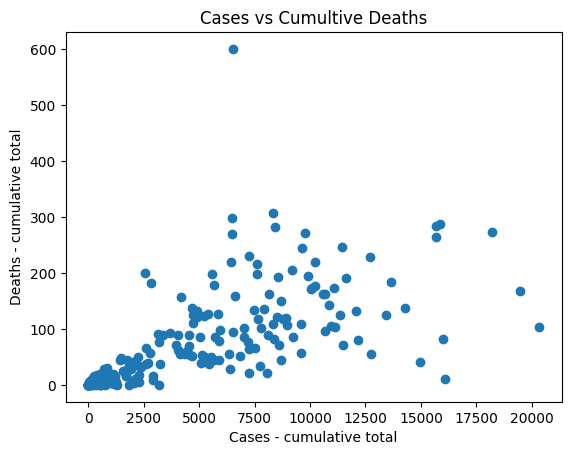

In [ ]:
fig, ax=plt.subplots()

x = coviddf['Cases - cumulative total']
y = coviddf['Deaths - cumulative total']
ax.set_xlabel('Cases - cumulative total')
ax.set_ylabel('Deaths - cumulative total')
ax.set_title('Cases vs Cumultive Deaths')
ax.scatter(x, y)
plt.show()

In [ ]:
x.corr(y)
#Correlation is significant if its absolute value is greater than 0.75 and in this case it is not significant.
#Therefore Total Deaths is not signiicant.

0.686298535245173

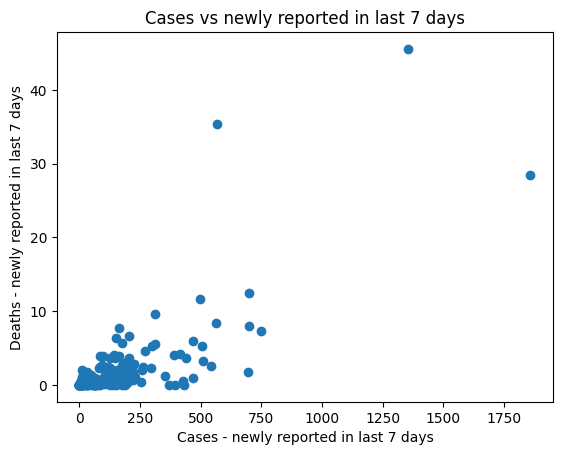

In [ ]:
fig, ax=plt.subplots()
a = coviddf['Cases - newly reported in last 7 days']
b = coviddf['Deaths - newly reported in last 7 days']
ax.set_xlabel('Cases - newly reported in last 7 days')
ax.set_ylabel('Deaths - newly reported in last 7 days')
ax.set_title('Cases vs newly reported in last 7 days')
ax.scatter(a, b)
plt.show()

In [ ]:
a.corr(b)
#Correlation is significant if its absolute value is greater than 0.75 and in this case it is significant.
#Therefore Deaths in the last last 7 days is significant.

0.763143105316212

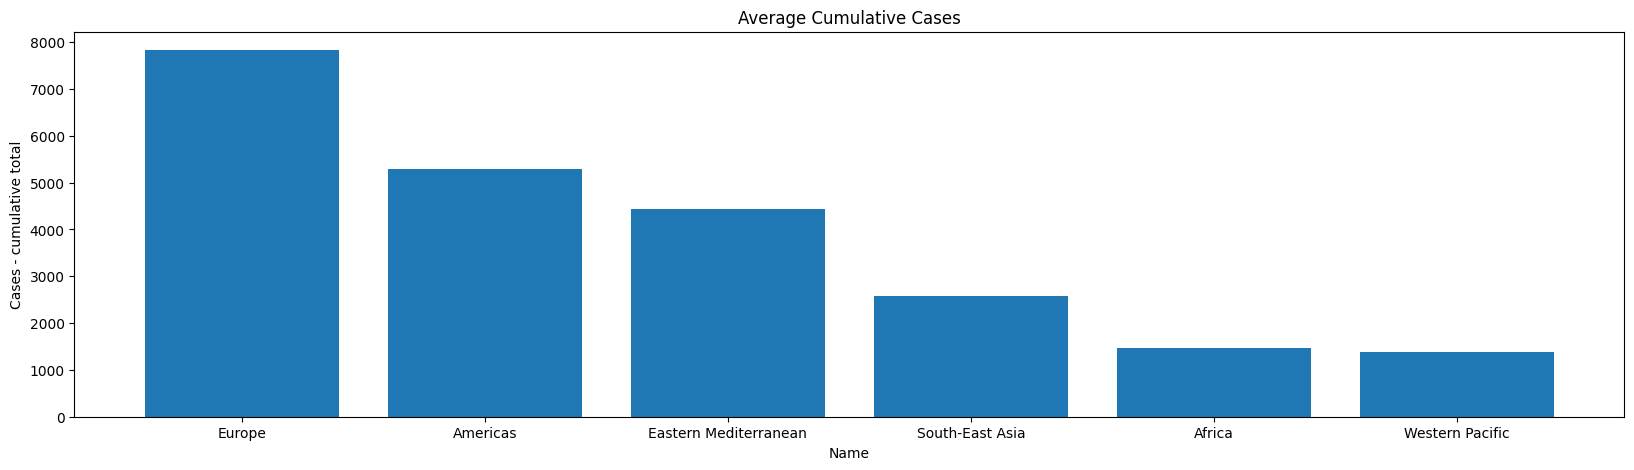

In [ ]:
#Make a bar graph of average Cumulative Cases in each region. Which region has the highest Cases? Which region has the lowest Cases?
region = coviddf.groupby('Name')['Cases - cumulative total'].mean()
region = region.sort_values(ascending=False)
fig, ax = plt.subplots(figsize = (20, 5))
e = region.index
f = region.values
ax.set_xlabel('Name')
ax.set_ylabel('Cases - cumulative total')
ax.set_title('Average Cumulative Cases')
ax.bar(e, f)
plt.show()

In [ ]:
region.max()

7831.949193548387

In [ ]:
region.min()

1376.4551428571428

In [ ]:
emissionsdf.columns.tolist()

['Unnamed: 0',
 'region',
 'country',
 'emissions',
 'type',
 'segment',
 'reason',
 'baseYear',
 'notes']

In [ ]:
happydf.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [ ]:
happydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [ ]:
happydf.columns.tolist()

['Country name',
 'Regional indicator',
 'Ladder score',
 'Standard error of ladder score',
 'upperwhisker',
 'lowerwhisker',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Ladder score in Dystopia',
 'Explained by: Log GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption',
 'Dystopia + residual']

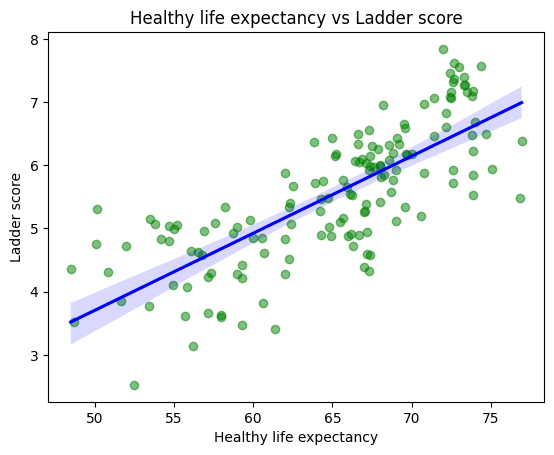

In [ ]:
fig, ax=plt.subplots()
g = happydf['Healthy life expectancy']
h = happydf['Ladder score']
ax.set_xlabel('Healthy life expectancy')
ax.set_ylabel('Ladder score')
ax.set_title('Healthy life expectancy vs Ladder score')
ax.scatter(g, h, color = 'green', alpha=.5)
sns.regplot(x=g, y=h, scatter=False, color='blue')
plt.show()

In [ ]:
happy_corr = g.corr(h)
happy_corr = round(happy_corr, 2)
sig = 0.75
if happy_corr < sig:
  print('Correlation and Life Expectancy is ', happy_corr, 'this is not significant.')
else:
  print('Correlation and Life Expectancy is ', happy_corr, 'this is significant.')

Correlation and Life Expectancy is  0.77 this is significant.


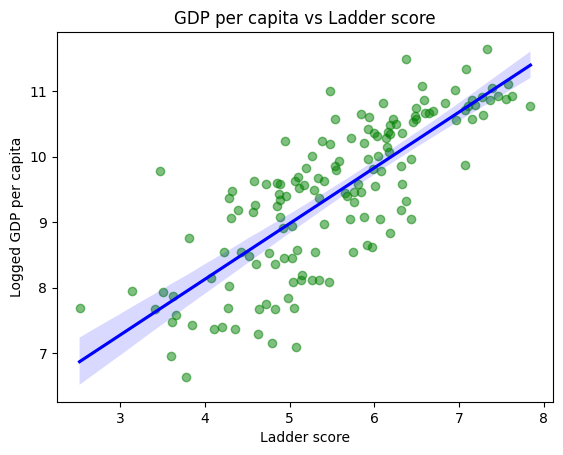

In [ ]:
fig, ax=plt.subplots()
j = happydf['Ladder score']
i = happydf['Logged GDP per capita']
ax.set_xlabel('Ladder score')
ax.set_ylabel('Logged GDP per capita')
ax.set_title('GDP per capita vs Ladder score')
ax.scatter(j, i, color = 'green', alpha=.5)
sns.regplot(x=j, y=i, scatter=False, color='blue')
plt.show()

In [ ]:
happy_corr = j.corr(h)
happy_corr = round(happy_corr, 2)
sig = 0.75
if happy_corr < sig:
  print('Correlation and Life Expectancy is ', happy_corr, 'this is not significant.')
else:
  print('Correlation and Life Expectancy is ', happy_corr, 'this is significant.')

Correlation and Life Expectancy is  0.79 this is significant.


In [ ]:
happydf['Regional indicator'].value_counts()

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

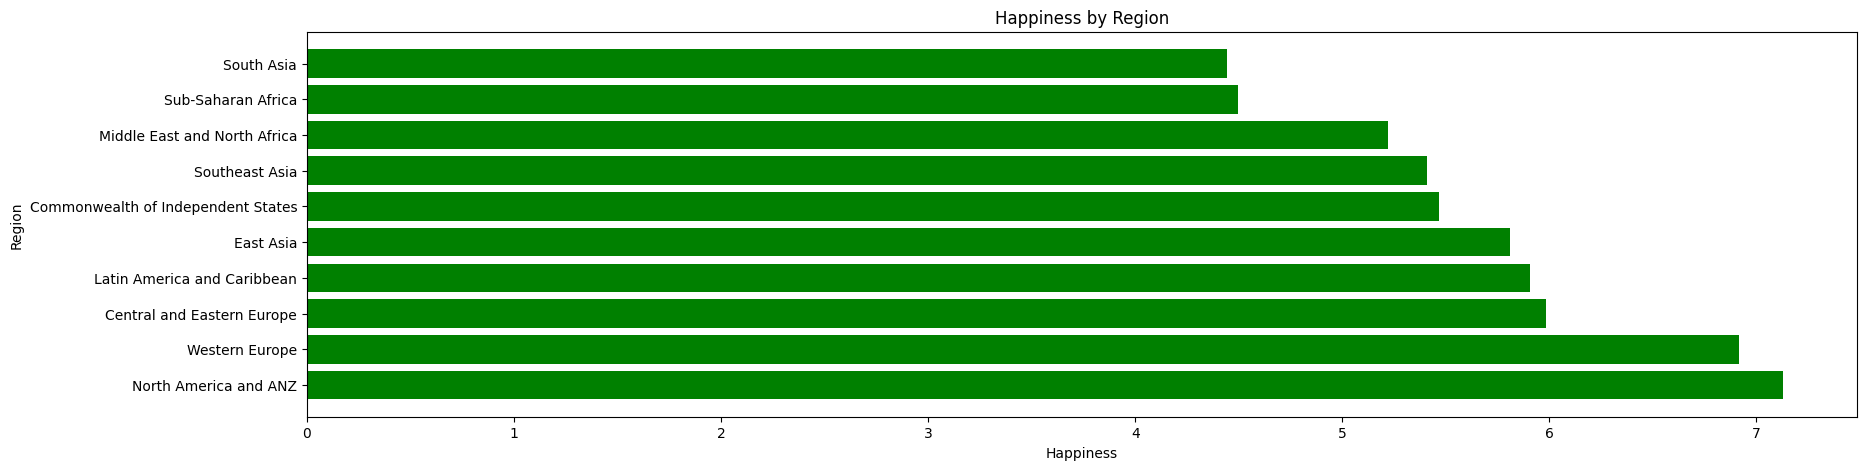

In [ ]:
#Make a bar graph of average Cumulative Cases in each region. Which region has the highest Cases? Which region has the lowest Cases?
region = happydf.groupby('Regional indicator')['Ladder score'].mean()
region = region.sort_values(ascending=False)
fig, ax = plt.subplots(figsize = (20, 5))
j = region.index
f = region.values
ax.set_xlabel('Happiness')
ax.set_ylabel('Region')
ax.set_title('Happiness by Region')
ax.barh(j, f, color='green')
plt.show()

In [ ]:
happydf.columns.tolist()

['Country name',
 'Regional indicator',
 'Ladder score',
 'Standard error of ladder score',
 'upperwhisker',
 'lowerwhisker',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Ladder score in Dystopia',
 'Explained by: Log GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption',
 'Dystopia + residual']

In [ ]:
region = region.sort_values()
region

Regional indicator
South Asia                            4.441857
Sub-Saharan Africa                    4.494472
Middle East and North Africa          5.219765
Southeast Asia                        5.407556
Commonwealth of Independent States    5.467000
East Asia                             5.810333
Latin America and Caribbean           5.908050
Central and Eastern Europe            5.984765
Western Europe                        6.914905
North America and ANZ                 7.128500
Name: Ladder score, dtype: float64

In [ ]:
emissionsdf.head()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


In [ ]:
emissionsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1548 non-null   int64  
 1   region      1548 non-null   object 
 2   country     1548 non-null   object 
 3   emissions   1548 non-null   float64
 4   type        1548 non-null   object 
 5   segment     1548 non-null   object 
 6   reason      1548 non-null   object 
 7   baseYear    1548 non-null   object 
 8   notes       1548 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 109.0+ KB


In [ ]:
emissionsdf['region'].value_counts()

Africa                       406
Europe                       302
Asia Pacific                 270
Middle East                  187
Central and South America    183
Russia & Caspian              96
North America                 61
World                         22
Other                         21
Name: region, dtype: int64

In [ ]:
emissionsdf.columns.tolist()

['Unnamed: 0',
 'region',
 'country',
 'emissions',
 'type',
 'segment',
 'reason',
 'baseYear',
 'notes']

In [ ]:
# What is the correlation between these two variables? There is only 1 variable in this data set so a correlation cannot be made.

In [ ]:
y = np.array([l])
plt.pie()
plt.show()

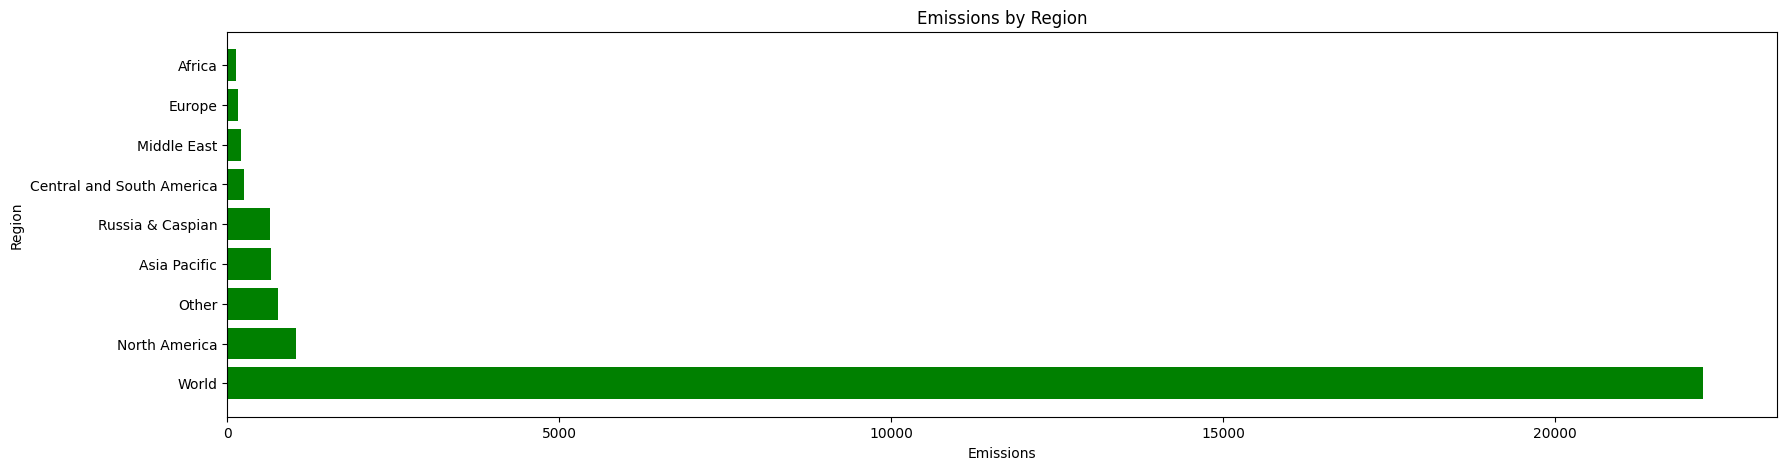

In [ ]:
region = emissionsdf.groupby('region')['emissions'].mean()
region = region.sort_values(ascending=False)
fig, ax = plt.subplots(figsize = (20, 5))
k = region.index
l = region.values
ax.set_xlabel('Emissions')
ax.set_ylabel('Region')
ax.set_title('Emissions by Region')
ax.barh(k, l, color='green')
plt.show()

In [ ]:
emissionsdf['type'].unique()

array(['Agriculture', 'Energy', 'Other', 'Waste'], dtype=object)

In [ ]:
emissionsdf['type'].value_counts()

Energy         1233
Agriculture     105
Other           105
Waste           105
Name: type, dtype: int64